In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import glob
from scipy.optimize import curve_fit

%matplotlib inline

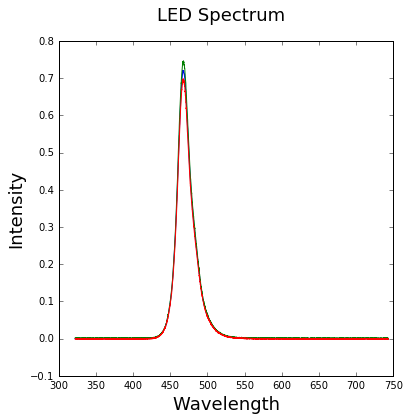

In [2]:
#set path to the files location

path = '/Users/austinmcdonald/Desktop/data/led spec/' # this is the path
Nled=len(os.listdir(path))                            # this is the number of files
filenameled=list(os.listdir(path))                    # this puts the files into a list

# defining empty arrays 
analysisled = []
wavelength = []
intensity = []
# Importing all of the files and saving them to one array
for x in range(1,Nled):
    analysisled.append(np.genfromtxt(path + filenameled[x],delimiter=",",skip_header=33,skip_footer=1))
# This picks out all of the xvals and yvals from the prevous array 
#... note it goes from 0 to x because mac puts an extra file in 
for y in range(0,x):
    wavelength.append(analysisled[y][:,0])
    intensity.append(analysisled[y][:,1])

    
Meanwavelength = np.mean(wavelength,axis = 0)          # Finds the mean of the xvalues

Meanintensity = np.mean(intensity,axis = 0)            # Finds the mean of the yvalues

SDintensity = np.std(intensity,axis = 0)               # Finds the SD of the yvalues
uperr = Meanintensity + SDintensity                    # Adds the SD to the mean 
dnerr = Meanintensity - SDintensity                    # Subtracts the SD from the mean

plt.figure(figsize=(6,6))
plt.plot(Meanwavelength,Meanintensity)
plt.plot(Meanwavelength,uperr)
plt.plot(Meanwavelength,dnerr)


plt.suptitle('LED Spectrum',size= 18)
plt.xlabel('Wavelength', fontsize=18)
plt.ylabel('Intensity', fontsize=18)
plt.show()